In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
der_df = pd.read_csv('KO_data/severity_SKO_RECON_Pathways.csv')
der_df.Phenotype= der_df.Phenotype.str.replace('s','Series')
der_df.head()

,Pathway,NB,Phenotype
0,Fatty acid oxidation,2,S1
1,Glycerophospholipid metabolism,19,S1
2,Methionine and cysteine metabolism,3,S1
3,Nucleotide interconversion,42,S1
4,Sphingolipid metabolism,2,S1


In [4]:
der_df.Pathway.unique()

array(['Fatty acid oxidation', 'Glycerophospholipid metabolism',
       'Methionine and cysteine metabolism', 'Nucleotide interconversion',
       'Sphingolipid metabolism', 'Starch and sucrose metabolism',
       'Transport, extracellular', 'Inositol phosphate metabolism',
       'Pyrimidine synthesis', 'Alanine and aspartate metabolism',
       'Folate metabolism',
       'Glycine, serine, alanine, and threonine metabolism'], dtype=object)

In [5]:
der_df.shape

(38, 3)

In [6]:
# Read Recon pathways reactions for RECON3 subsystems
pathway_df = pd.read_csv('RECON_Pathway_Reactions.csv')
pathway_df.head()
pathway_df_unq = pathway_df.groupby(['Var1']).agg(['count'])
pathway_df_unq.columns

MultiIndex([('Var2', 'count')],
           )

#Calculate the percentage of rxns in a pathway
for i in range(der_df.shape[0]):
    pathway = der_df.iloc[i,0]
    rxns_count = int(pathway_df_unq.loc[pathway,:].values)
    der_df.iloc[i,1] = der_df.iloc[i,1]/rxns_count
    der_df.iloc[i,2] = der_df.iloc[i,2]/rxns_count
der_df.head()

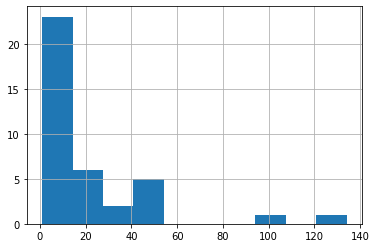

In [7]:
der_df.iloc[:,1].hist()

In [8]:
#der_df = der_df.loc[der_df.iloc[:,1]>3,:]
# Calculate the percentage of rxns in a pathway
for i in range(der_df.shape[0]):
    pathway = der_df.iloc[i,0]
    rxns_count = int(pathway_df_unq.loc[pathway,:].values)
    der_df.iloc[i,1] = der_df.iloc[i,1]/rxns_count

In [9]:
der_df.shape

(38, 3)

In [10]:
#der_df = der_df.loc[der_df.iloc[:,1]>0.05,der_df.iloc[:,2]>0.05)

In [11]:
der_df.shape

(38, 3)

In [12]:
der_T = der_df.pivot_table(values='NB',index='Pathway', columns='Phenotype',aggfunc='mean',fill_value=None,dropna=False)
der_T = der_T.fillna(0)


In [13]:
der_T.head(2)

Phenotype,S1,S16,S2,S5,S6,S7
Pathway,,,,,,
Alanine and aspartate metabolism,0.000000,0.0,0.0,0.0,0.076923,0.000000
Fatty acid oxidation,0.002081,0.0,0.0,0.0,0.002081,0.002081


In [14]:
der_T.columns

Index(['S1', 'S16', 'S2', 'S5', 'S6', 'S7'], dtype='object', name='Phenotype')

In [16]:
der_T_1 = der_T.loc[:,['S2', 'S6', 'S5', 'S16', 'S1', 'S7']]

In [17]:
der_T_1.columns = ['A549_0.02', 'A549_0.2_ACE2',  'A549_2','A549_2_ACE2','NHBE_2','Calu3_2']

In [18]:
lung1_pathways = der_T_1.index.tolist()

In [19]:
lung1_pathways

['Alanine and aspartate metabolism',
 'Fatty acid oxidation',
 'Folate metabolism',
 'Glycerophospholipid metabolism',
 'Glycine, serine, alanine, and threonine metabolism',
 'Inositol phosphate metabolism',
 'Methionine and cysteine metabolism',
 'Nucleotide interconversion',
 'Pyrimidine synthesis',
 'Sphingolipid metabolism',
 'Starch and sucrose metabolism',
 'Transport, extracellular']

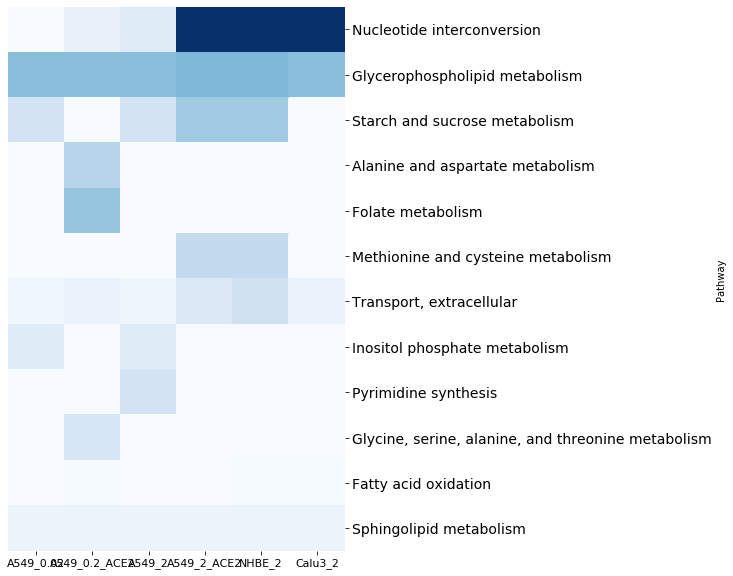

In [21]:
g = sns.clustermap(der_T_1,
                   col_cluster=False,
                   row_cluster=True,
                   mask=False,
                   #standard_scale=0,
                   yticklabels=True,
                   cmap="Blues",
                   #square=True,
                   #figsize=(12,(.3*(len(enrich_coverage_all.index))))
                  )
g.cax.set_visible(False)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 11, rotation=0)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 14, rotation=0)
#g.savefig('output_summ/SKO_Metabolic_Pathways.svg', dpi=400,bbox_inches='tight')
g.savefig('Figs/SKO_Lung_1_Metabolic_Pathways.svg', dpi=400,bbox_inches='tight')

In [22]:
#der_T.to_csv('output_summ/Differentially_Expressed_Reactions_Up.csv')

### Lung study 2

In [23]:
der_df = pd.read_csv('KO_data/timeseries_RECON_SKO_Pathways.csv')
#der_df.Phenotype= der_df.Phenotype.str.replace('s','Series')
der_df.head()

,Pathway,NB,Phenotype
0,Fatty acid oxidation,2,Calu3_12h
1,Glycerophospholipid metabolism,18,Calu3_12h
2,Inositol phosphate metabolism,2,Calu3_12h
3,Nucleotide interconversion,2,Calu3_12h
4,Sphingolipid metabolism,2,Calu3_12h


In [24]:
der_df.shape

(55, 3)

#Calculate the percentage of rxns in a pathway
for i in range(der_df.shape[0]):
    pathway = der_df.iloc[i,0]
    rxns_count = int(pathway_df_unq.loc[pathway,:].values)
    der_df.iloc[i,1] = der_df.iloc[i,1]/rxns_count
    der_df.iloc[i,2] = der_df.iloc[i,2]/rxns_count
der_df.head()

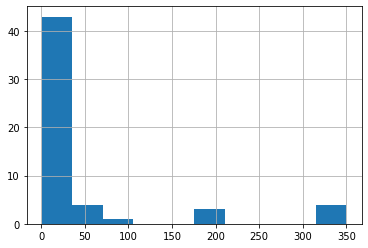

In [25]:
der_df.iloc[:,1].hist()

In [26]:
# Calculate the percentage of rxns in a pathway
for i in range(der_df.shape[0]):
    pathway = der_df.iloc[i,0]
    rxns_count = int(pathway_df_unq.loc[pathway,:].values)
    der_df.iloc[i,1] = der_df.iloc[i,1]/rxns_count

In [27]:
der_df.shape

(55, 3)

In [28]:
#der_df = der_df.loc[der_df.iloc[:,1]>0.05,der_df.iloc[:,2]>0.05)

In [29]:
der_T = der_df.pivot_table(values='NB',index='Pathway', columns='Phenotype',aggfunc='mean',fill_value=None,dropna=False)
der_T = der_T.fillna(0)
der_T_2  =der_T.loc[:,['Calu3_4h', 'Calu3_8h','Calu3_12h', 'Calu3_24h', 'H1299_4h',  'H1299_12h','H1299_24h', 'H1299_36h']]

In [30]:
lung2_pathways = der_T_2.index.tolist()

In [31]:
der_T_2.head(2)

Phenotype,Calu3_4h,Calu3_8h,Calu3_12h,Calu3_24h,H1299_4h,H1299_12h,H1299_24h,H1299_36h
Pathway,,,,,,,,
Fatty acid oxidation,0.002081,0.002081,0.002081,0.002081,0.002081,0.002081,0.002081,0.002081
Glycerophospholipid metabolism,0.109091,0.109091,0.109091,0.115152,0.218182,0.218182,0.218182,0.218182


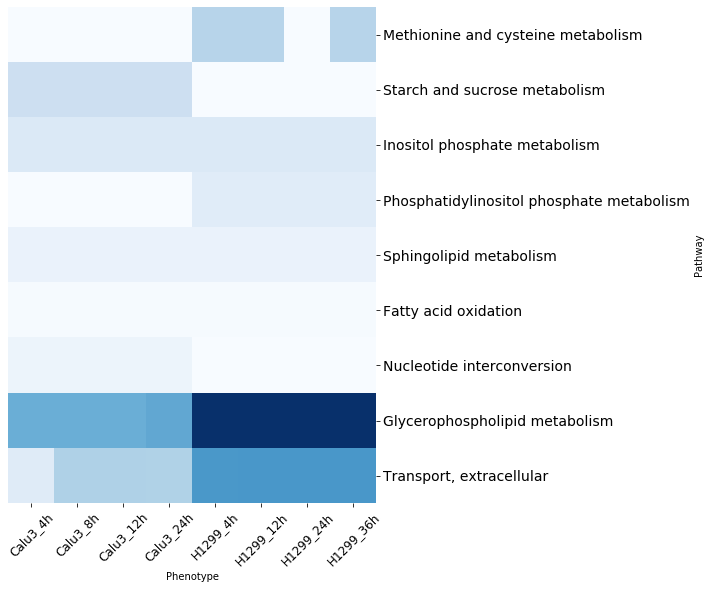

In [33]:
g = sns.clustermap(der_T_2,
                   col_cluster=False,
                   row_cluster=True,
                   mask=False,
                   #standard_scale=0,
                   yticklabels=True,
                   cmap="Blues",
                   #square=True,
                   #figsize=(12,(.3*(len(enrich_coverage_all.index))))
                  )
g.cax.set_visible(False)
g.ax_row_dendrogram.set_visible(False)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 12, rotation=45)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 14, rotation=0)

g.ax_col_dendrogram.set_visible(False)
#g.savefig('output_summ_/SKO_Metabolic_Pathways.png', dpi=400,bbox_inches='tight')
g.savefig('Figs/SKO_Lung_2_Metabolic_Pathways.svg', dpi=400,bbox_inches='tight')

In [35]:
#der_T_2.to_csv('output_summ_/Differentially_Expressed_Reactions_Up.csv')

In [36]:
# Merge DER from the 2 studies
der_T = pd.concat([der_T_1, der_T_2], axis=1, join="outer")
der_T = der_T.fillna(0)

In [37]:
der_T.mean(axis=1).sort_values(ascending=False).index

Index(['Glycerophospholipid metabolism', 'Transport, extracellular',
       'Nucleotide interconversion', 'Starch and sucrose metabolism',
       'Methionine and cysteine metabolism', 'Inositol phosphate metabolism',
       'Sphingolipid metabolism', 'Folate metabolism',
       'Phosphatidylinositol phosphate metabolism',
       'Alanine and aspartate metabolism', 'Pyrimidine synthesis',
       'Glycine, serine, alanine, and threonine metabolism',
       'Fatty acid oxidation'],
      dtype='object')

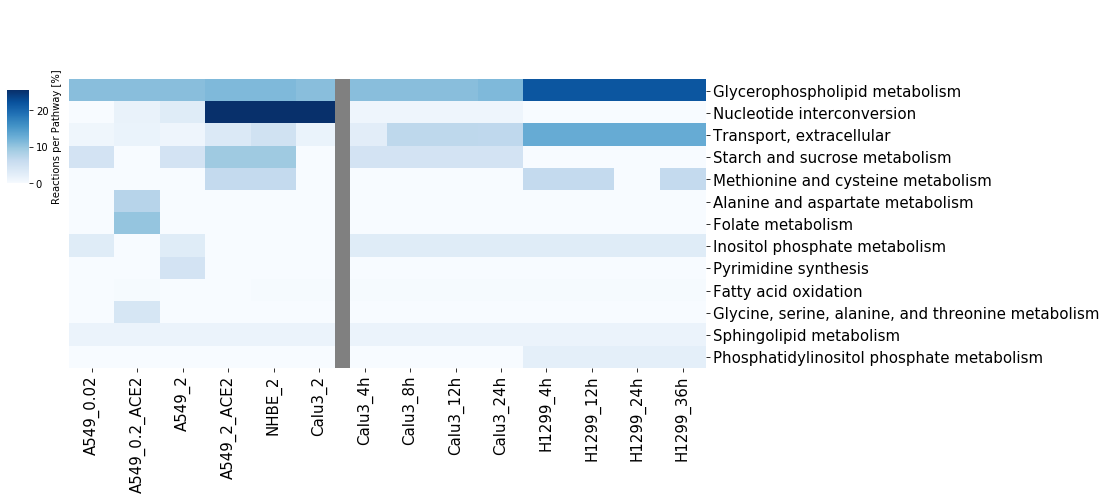

In [48]:
g = sns.clustermap(der_T*100,col_cluster=False, row_cluster=True,mask=False,
                   annot_kws={'fontsize':'x-large'},
                   #standard_scale=0,yticklabels=True,#square=True,
                   cmap="Blues",
                   cbar_kws={'label':'Reactions per Pathway [%]'},#,"orientation": "horizontal"},
                   cbar_pos=(0.1, .6, .02, .2),
                   figsize=(15,(0.5*(len(der_T.index)))))
#g.cax.set_visible(True)
g.ax_row_dendrogram.set_visible(False)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 15, rotation=75)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 15, rotation=0)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90)
g.ax_heatmap.axvline(6, 0, 1, linewidth=15, c='grey')
#g.ax_col_dendrogram.set_visible(False)
g1 = g
g.savefig('Figs/SKO_Metabolic_Pathways.svg', dpi=400,bbox_inches='tight')

In [39]:
# Read Enrichr pathways to make it in 1 fig
enrichr1 = pd.read_csv('figs/Lung1_Kegg.csv')
enrichr1.index = enrichr1.Term
enrichr1 = enrichr1.iloc[:,[5,6,7,8,9,10]]
enrichr2 = pd.read_csv('figs/Lung2_Kegg.csv')
enrichr2.index = enrichr2.Term
enrichr2 = enrichr2.iloc[:,[5,6,7,8,9,10,11,12]]
enrichr = pd.concat([enrichr1, enrichr2], axis=1, join="outer")
enrichr = enrichr.fillna(0)
enrichr.head()

,A549_0.02,A549_0.2_ACE2,A549_2,A549_2_ACE2,NHBE_2,Calu3_2,CALU3_4H,CALU3_8H,CALU3_12H,CALU3_24H,H1299_4H,H1299_12H,H1299_24H,H1299_36H
Pyrimidine metabolism,0.000000,0.017544,0.017544,0.017544,0.017544,0.017544,0.00,0.0,0.00,0.000,0.000,0.0,0.0,0.000
Protein digestion and absorption,0.011111,0.000000,0.011111,0.022222,0.022222,0.000000,0.00,0.0,0.00,0.000,0.000,0.0,0.0,0.000
One carbon pool by folate,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.000,0.000,0.0,0.0,0.000
"Glycine, serine and threonine metabolism",0.000000,0.025000,0.000000,0.025000,0.025000,0.000000,0.00,0.0,0.00,0.000,0.025,0.0,0.0,0.025
Ferroptosis,0.050000,0.000000,0.050000,0.000000,0.000000,0.000000,0.05,0.0,0.05,0.025,0.000,0.0,0.0,0.000


In [50]:
enrichr.columns = der_T.columns

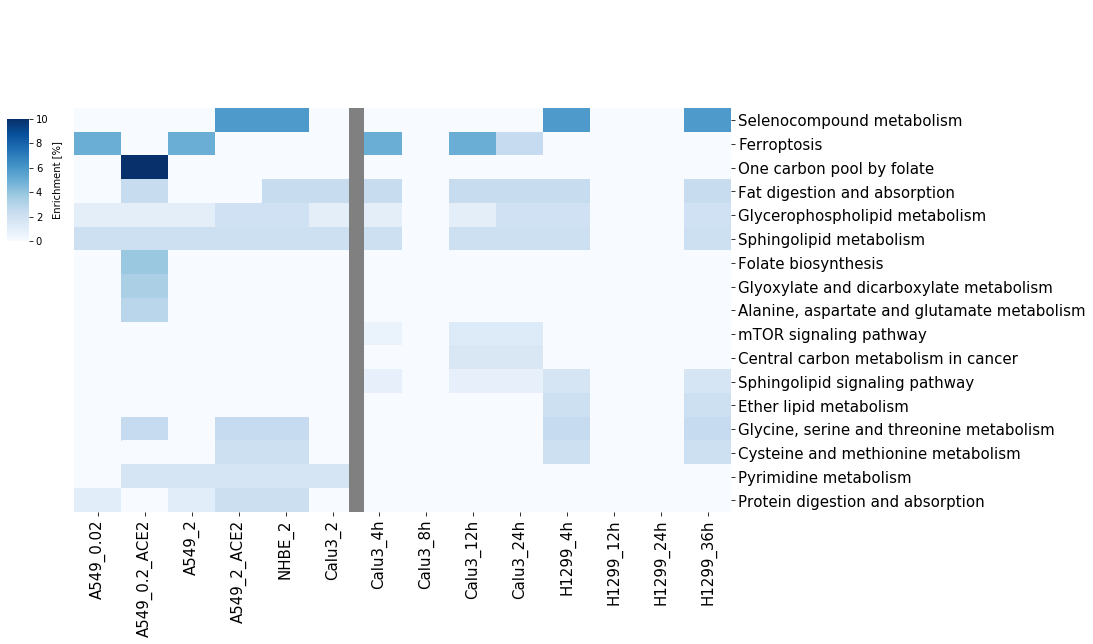

In [51]:
g = sns.clustermap(enrichr*100,col_cluster=False, row_cluster=True,mask=False,
                   annot_kws={'fontsize':'x-large'},
                   #standard_scale=0,yticklabels=True,#square=True,
                   cmap="Blues",
                   cbar_kws={'label':'Enrichment [%]'},#,"orientation": "horizontal"},
                   cbar_pos=(0.1, .6, .02, .2),
                   figsize=(15,(0.5*(len(enrichr.index)))))
#g.cax.set_visible(True)
g.ax_row_dendrogram.set_visible(False)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 15, rotation=75)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 15, rotation=0)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90)
g.ax_heatmap.axvline(6, 0, 1, linewidth=15, c='grey')
#g.ax_col_dendrogram.set_visible(False)
g.savefig('Figs/SKO_Enrichr_Pathways.svg', dpi=400,bbox_inches='tight')

In [53]:
der_T.shape

(13, 14)

In [54]:
enrichr.shape

(17, 14)

In [55]:
der_T

,A549_0.02,A549_0.2_ACE2,A549_2,A549_2_ACE2,NHBE_2,Calu3_2,Calu3_4h,Calu3_8h,Calu3_12h,Calu3_24h,H1299_4h,H1299_12h,H1299_24h,H1299_36h
Alanine and aspartate metabolism,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fatty acid oxidation,0.000000,0.002081,0.000000,0.000000,0.002081,0.002081,0.002081,0.002081,0.002081,0.002081,0.002081,0.002081,0.002081,0.002081
Folate metabolism,0.000000,0.101695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Glycerophospholipid metabolism,0.109091,0.109091,0.109091,0.115152,0.115152,0.109091,0.109091,0.109091,0.109091,0.115152,0.218182,0.218182,0.218182,0.218182
"Glycine, serine, alanine, and threonine metabolism",0.000000,0.042553,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Inositol phosphate metabolism,0.030769,0.000000,0.030769,0.000000,0.000000,0.000000,0.030769,0.030769,0.030769,0.030769,0.030769,0.030769,0.030769,0.030769
Methionine and cysteine metabolism,0.000000,0.000000,0.000000,0.065217,0.065217,0.000000,0.000000,0.000000,0.000000,0.000000,0.065217,0.065217,0.000000,0.065217
Nucleotide interconversion,0.000000,0.018293,0.030488,0.256098,0.256098,0.256098,0.012195,0.012195,0.012195,0.012195,0.000000,0.000000,0.000000,0.000000
Pyrimidine synthesis,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sphingolipid metabolism,0.015038,0.015038,0.015038,0.015038,0.015038,0.015038,0.015038,0.015038,0.015038,0.015038,0.015038,0.015038,0.015038,0.015038
